<div class="alert alert-info" style="background-color:#001b32; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> Domain – Banking /Loan   </h2>
</div>



<div class="alert alert-info" style="background-color:#002b32; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> Focus – To Lower NPA (Non Performing Asset) in Loan Product </h2>
</div>

    
######    Business challenge/requirement
       
- PeerLoanKart is an NBFC (Non-BankingFinancial Company) which facilitates peer to peer loan. (Its not a actual bank, it provides connection between Lender and Borrower)
 - It connects people who need money (borrowers) with people who have money (investors). 
- As an investor,you would want to invest in people who showed a profile of having a high probability of paying you back. 
- Ensure NPAs are lower –> meaning PeerLoanKart wants to be very diligent in giving loans to borrower
    NPA - Non-performing asset
- You as a ML expert create a model that will help predict whether a borrower will pay the loan or not. 

###### Business Benifits
- Here we have History data of Loan Borrower repayment/Instalment details. In that few didnt return Loan within the time period and they became Non performing Asset(NPA) to the company. Based on this details, we need to **identify early like who may be going to be such NPA in future**, so that Company can target those cutomer for repayment properly in montly instalment. 
- This will decrease % of becoming NPA and reduceces loss to the company and lender
-  Increase in profits up to 20% as NPA will be reduced due to loan disbursal for only good borrowers

### Loan Eligibility Case Study

#### Here are what the data represent:

* **credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* **purpose:** The purpose of the loan 
    - (Takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* **int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). 
    - Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* **installment:** The monthly installments owed by the borrower if the loan is funded.
* **log.annual.inc:** The **natural log** of the self-reported annual income of the borrower.
* **dti:** The **debt-to-income** ratio of the borrower (amount of debt divided by annual income, Total Loan/Anual Income--> If its less, its good)).
* **fico:** The FICO credit score of the borrower.
* **days.with.cr.line:** The number of days the borrower has had a credit line.
* **revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* **revol.util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* **inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.
* **delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* **pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

* **not.fully.paid:** This is the **output** field. Please note that **1 means borrower is not going to pay the loan completely**

<div class="alert alert-info" style="background-color:#005b02; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> TYPE OF PROBLEM:  </h2>
</div>


 > The above problem is a clear classification problem as we need to classify whether the Loan going to be NPA_Status is yes(1) or no(0). So this can be solved by any of the classification techniques like

    > Logistic Regression .

    > Decision Tree Algorithm.

    > Random Forest Technique.
    
    > Gradient Tree Boosting  (Not used here)
    
    > SVM Classifier
    
    > KNN Classifier (Not used here)
    
    > Naive Bayes (But I/P are not independent) (Not used here)
    
    
## Lifecycle In A Data Science Projects

- Data Cleaning
- Exploratory Data Analysis
- Done Categorial data handling
- Selection of Models: Decision Tree, Random Forest, etc

- Used Initial simple model and hyper parameter tuned model 
- Evaluated the result

- Used Imbalance data handling by SMOTE (Oversampling) + Tomek (Undersampling)
- Evaluated the Models


- Used Scalarization and Imbalance data handling by SMOTE (Oversampling) + Tomek (Undersampling)
-  Evaluated the Models


- **Outcome:By this model reduced the False Negative Errors of such Actual NPA(1) predicted as Non NPA(0)  which is a great advantage for the PeerLoanKart financial company and its customers as well.**
    

<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 1. Import all Librariy  </h2>
</div>


In [168]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [239]:
loans = pd.read_csv(r".\Dataset\loan_borowwer_data.csv")
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB




>  Here no null values, data looks ok  

In [240]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature

In [171]:
loans.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [172]:
loans.head(7713)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,1,home_improvement,0.1379,851.89,11.238489,4.45,717,5249.958333,165,2.5,2,0,0,1
7709,1,major_purchase,0.1287,840.83,11.459525,0.13,757,2190.000000,14,0.2,2,0,0,1
7710,0,debt_consolidation,0.1608,35.20,10.308953,23.84,642,2490.000000,10125,90.4,1,0,0,0
7711,0,debt_consolidation,0.1608,246.38,12.152144,22.47,647,7212.000000,150971,92.3,4,0,0,1


In [173]:
loans["not.fully.paid"].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

>  By seeing this, Looks like Total 8045 records are of Non NPA and 1533 are as NPA, LESS NPA records we have in the data

- Its **Imbalanced data**, Here NPA are minority data

- All data are in ordered manner based on credit.policy	, starting all are credit.polic=1 and ending all are credit.policy=0, so while splitting we need to do random sample

In [174]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


>  Only **purpose** is categorical, remaining all are Numerical

In [175]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000



<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 2. Exploratory Data Analysis with Graphs and Visualization  </h2>
</div>

### 2.1 Visualize Different purposes loan taken 

In [176]:
loans['purpose'].unique()
# Different purposes taken loan

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [177]:
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

['all_other', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'major_purchase', 'small_business']
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64
[2331, 1262, 3957, 343, 629, 437, 619]


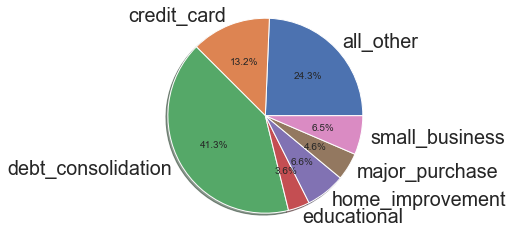

In [178]:
# It gives list of purpose as categorty
labels = loans['purpose'].astype('category').cat.categories.tolist()
print(labels)
counts = loans['purpose'].value_counts()
print(counts)
sizes = [counts[var_cat] for var_cat in labels]
print(sizes)

fig1, ax1 = plt.subplots()
explode = (0.5, 0, 0, 0, 0,0,0)
# 1st -> value/count/proprtion , 2nd label -> label value
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

> Maximum taken for Debt Consolidation

### 2.1 Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

Text(0.5, 0, 'FICO')

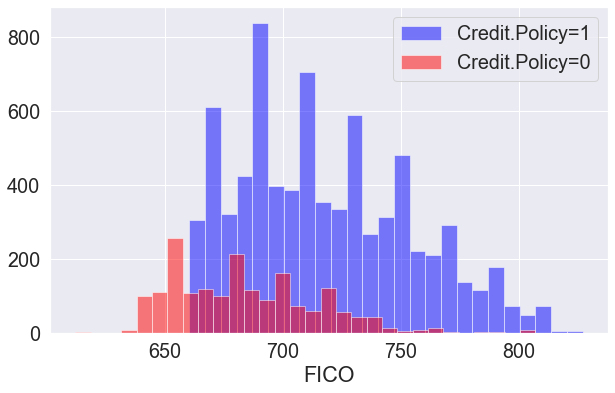

In [179]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

#### Observation: 
   > credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

   > fico: The FICO credit score of the borrower.
    
** By this we can see max customer who met the credit underwriting criteri (Blue) i.e credit.policy = 1 , who lies with all range of fico value -- > corresponding  Fico(credit score of the borrower.) histogram/freq distribution provided, 

- For credit.policy = 1, max freq are there where **FICO Rating 670 to 750** related bins

- For credit.policy = 0, max people are there where **FICO Rating 630 to 720** related bins AND few are lies belo 650 Fico rate also


###  2.2 Create a similar Histogram, except this time select by the not.fully.paid column

Text(0.5, 0, 'FICO')

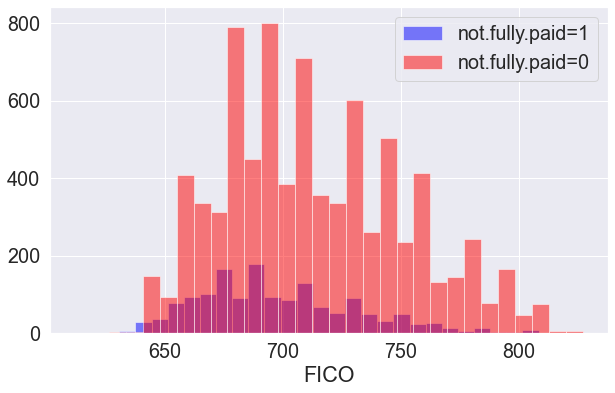

In [180]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

#### Observation:

####  not.fully.paid: This is the output field. Please note that 1 means borrower is not going to pay the loan completely** 
    *  Looks like all credit score/fico range people are there in not fully paid stack/bar
    * Credit scores are more, there less no of not fully paid(1) customer 
    * Credit scores 650 t0 700 related bins are having more  not fully paid customer 
    
- For not.fully.paid = 1, max freq are there where **FICO Rating 630 to 750** related bins

- For not.fully.paid = 0, max people are there where **FICO Rating 650 to 750** related bins AND Fully paid people are there for all range of FICO value

### 2.3 Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. 

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'all_other'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'educational')])

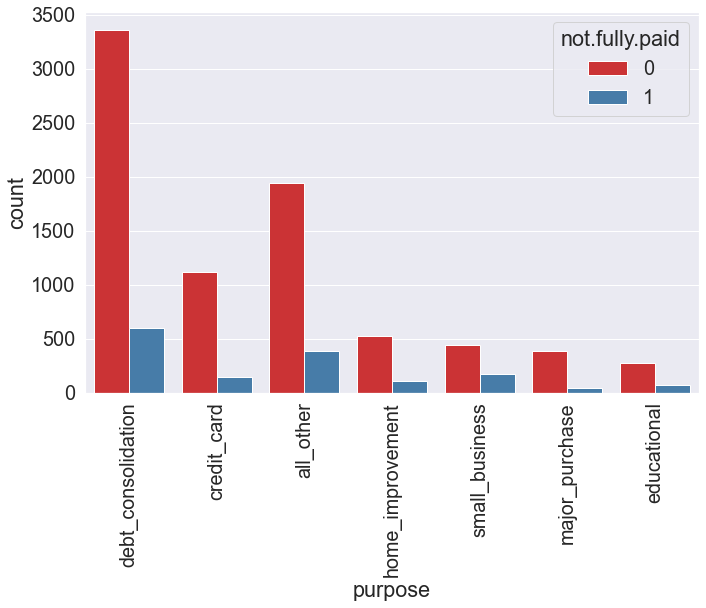

In [253]:
import seaborn as sns
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')
plt.xticks(rotation=90)

#### Observation:

*  not.fully.paid: This is the output field. Please note that 1 means borrower is not going to pay the loan completely** 
    * Looks like in all purpose category fully not paid custmer(1) are there
    * In that dept_consolidator has more count of not fully paid customer

### 2.4 Fully Paid and Not fully paid, Visual display:

> With Pie Chart visualizing the data

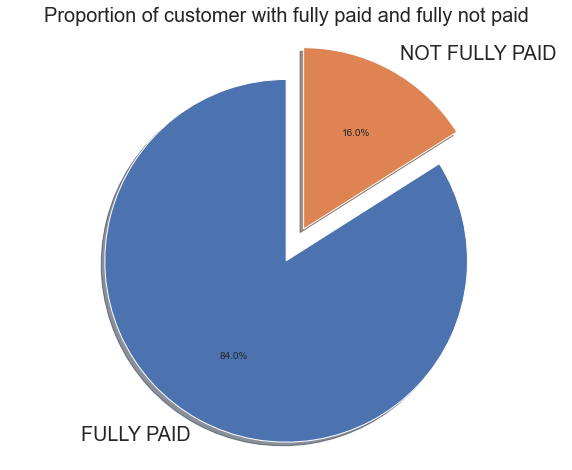

In [182]:
labels = 'FULLY PAID','NOT FULLY PAID'
sizes = [loans["not.fully.paid"][loans['not.fully.paid']==0].count(), loans["not.fully.paid"][loans['not.fully.paid']==1].count()]
explode = (0, 0.2)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer with fully paid and fully not paid", size = 20)
plt.show()

### 2.5 Correlation:

> With Heat map also we can decide which are correlated more and we can ignore repeatative type


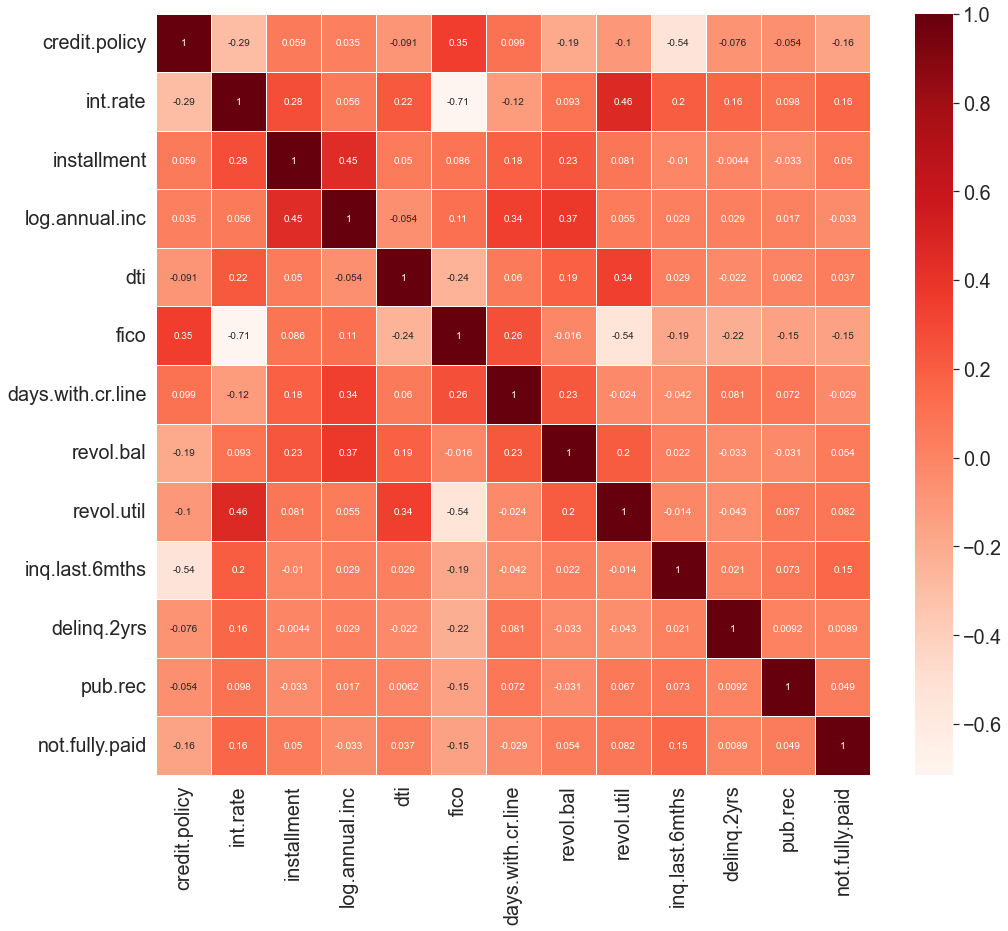

In [183]:
fig, ax = plt.subplots(figsize=(16,14))
corr = loans.corr()
#print(corr)
#plt.figure(figsize=(5,10))
sns.heatmap(corr, cmap='Reds', annot=True, linewidths=.5, ax=ax)
plt.show()

> Here we are not removing any feature, there is no high correlated here.

### 2.5  Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using **pd.get_dummies.(One_hot_dog encoding)**


In [184]:
##Create a list of 1 element containing the col name 'purpose'.
cat_feats = ['purpose']

In [185]:
# Here we convert column 'purpose' value as each new column which is One_hot_dog encoding
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [186]:
final_data.info()
#Here after one-hot , it increased col number baed on distinct purpose values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 


* Each of the feild purpose_ will have value 0 or 1 based on the category **

### 2.6 Handling feature selection to get Unique features

- Here we are checking varience to do feature selection

In [187]:
from sklearn.feature_selection import VarianceThreshold
# zero variance (unique values)

# Taking all input col dropping Output col
final_data1 = final_data.drop('not.fully.paid',axis=1)

# Taking all input col
final_data_num = final_data1

constant_filter = VarianceThreshold(threshold=0)

constant_filter.fit(final_data_num)

print(final_data_num.columns[constant_filter.get_support()])
#Final data after feature selection
final_num = final_data_num[final_data_num.columns[constant_filter.get_support()]]

# Here display column count of original and validated list
print("Length of Original data", len(final_data_num.columns), "\nLength of New data" , len(final_num.columns))

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')
Length of Original data 18 
Length of New data 18


> No different Unique features, same count, so need feature selection, using all feature

### 2.7 Handling Feature Importance

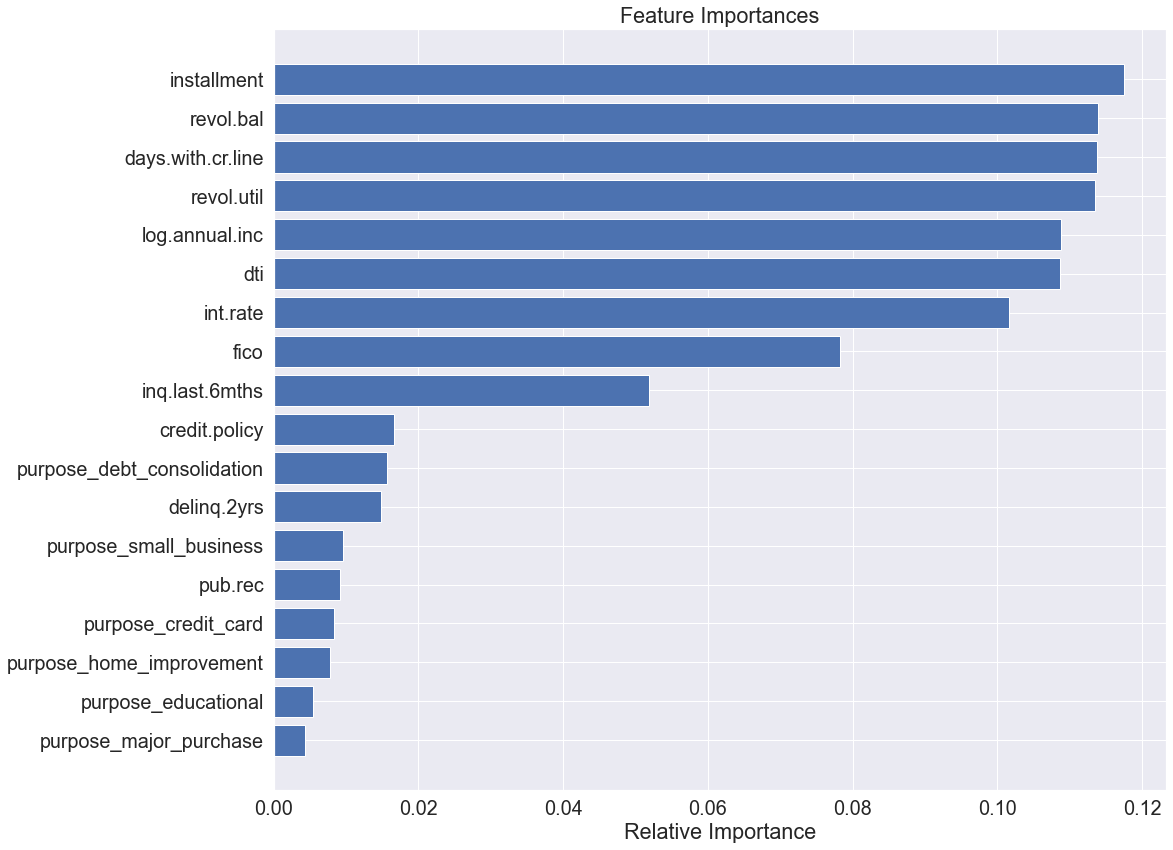

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)



rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
features = X_train.columns
importances = rfc.feature_importances_

fig, ax = plt.subplots(figsize=(16,14))

indices = np.argsort(importances)
#Bar plot
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.title('Feature Importances')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


> No featues with 0 importance, we will use original features

In [189]:
### 2.8 Recursive Feature Elimination :

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='lbfgs', max_iter=500)

rfe = RFE(model, 5, verbose=1)

#Test with full set, not on train
rfe = rfe.fit(X_train, y_train)

#This givs final suported col as True
rfe.support_

C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.


C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


array([ True,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True])

In [190]:
XX = X_train[X_train.columns[rfe.support_]]
XX.head()

# Below are the features suggested by RFE.

,credit.policy,int.rate,purpose_credit_card,purpose_major_purchase,purpose_small_business
4845,1,0.1426,0,0,0
6910,1,0.0774,0,0,0
8146,0,0.1520,0,0,0
7113,1,0.1385,0,0,0
195,1,0.1059,1,0,0


> This is one of the feature selection, tihs will be used for model build. But here we are not considered this.


<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 3. Train Test Split  </h2>
</div>

Now its time to split our data into a training set and a testing set!

- **not.fully.paid** is the output column , remainin all are Input column

### 3.1 Here Data are imbalanced, so we will try with 2 Approach and Finalize 1 way


##### 1. Random_state =101
> Remember the significance of random_state value  , Here 2 different data are in stanadrd order appr till 7000 record, so, we will use random_state=101, so it picks randomply 101 record for split

##### 2. Stratified approach 
- Here we will use Stratified approach based on the class value 0 or 1  of  **not.fully.paid**

In [191]:
final_data["not.fully.paid"].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

#### 1. Random_state =101

In [192]:
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X, y, test_size=0.30, random_state=101)

In [193]:
y_trainR.value_counts()

0    5614
1    1090
Name: not.fully.paid, dtype: int64

In [194]:
y_testR.value_counts()

0    2431
1     443
Name: not.fully.paid, dtype: int64

#### 2. Stratified approach 

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

In [196]:
y_train.value_counts()

0    5631
1    1073
Name: not.fully.paid, dtype: int64

In [197]:
y_test.value_counts()

0    2414
1     460
Name: not.fully.paid, dtype: int64

#### Observation: 

- Here both **Random_split** approach and **Stratified** approches are giving almost same count of classes after split. So imbalanced data in this datset is not problamatic, so we can take any one approach here. So continuing with stratified approach

- Normaly if we use stratified approach, in inbalanced data it should give better/equal split

In [198]:
X_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
8295,0,0.1134,197.40,9.798127,3.67,687,567.041667,745,22.4,3,0,0,0,0,1,0,0,0
3183,1,0.1347,101.77,10.778956,7.08,682,1320.000000,2660,66.5,0,0,0,1,0,0,0,0,0
3989,1,0.1218,266.40,10.757903,2.32,762,4474.000000,7470,38.3,1,0,0,0,0,0,0,1,0
6912,1,0.0859,37.94,11.512925,0.53,757,3990.000000,0,0.0,1,0,0,0,0,0,0,0,0
6987,1,0.1461,344.76,11.041321,8.46,712,4920.041667,3088,14.1,1,0,0,0,0,1,0,0,0



<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 4. Building Machine Learning Logistic Models  </h2>
</div>



#### 4.1 BUILDING BASELINE PERFORMANCE VIA DUMMY CLASSIFIER
-  This is the benchmarks for the models

In [199]:
from sklearn.dummy import DummyClassifier, DummyRegressor
simple_model ={}
model_prob ={}

dummy = DummyClassifier(strategy='stratified', random_state=42)
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
simple_model['dummy_mod'] = dummy_pred

y_pred_prob_dum = dummy.predict_proba(X_test)[:,1]
model_prob['dummy_mod'] = y_pred_prob_dum


dummy.score(X_test,y_test)

0.7383437717466945

### 4.2 LogisticRegression

In [200]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

# test the model
predictions_logR = log_reg.predict(X_test)
#simple_model.append({'Smp_LogReg': predictions_logR})
simple_model['Smp_LogReg'] = predictions_logR

y_pred_prob_LogR = log_reg.predict_proba(X_test)[:,1]
model_prob['Smp_LogReg'] = y_pred_prob_LogR


log_reg.score(X_test,y_test)

0.8399443284620738


### 4.3  Decision Tree 

- Let's start by training a single decision tree first!


In [201]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

predictions_Dt = dtree.predict(X_test)
#simple_model.append({'Smp_DT': predictions_Dt})
simple_model['Smp_DT'] = predictions_Dt

y_pred_prob_Dt = dtree.predict_proba(X_test)[:,1]
model_prob['Smp_DT'] = y_pred_prob_Dt


dtree.score(X_test,y_test)


0.7463465553235908

### 4.4  Random Foest 


In [202]:
from sklearn.ensemble import RandomForestClassifier

# Here settig no of DT =600
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions_rf = rfc.predict(X_test)

#simple_model.append({'Smp_RF': predictions_rf})
simple_model['Smp_RF'] = predictions_rf

y_pred_prob_rf = rfc.predict_proba(X_test)[:,1]
model_prob['Smp_RF'] = y_pred_prob_rf


rfc.score(X_test,y_test)

0.8385525400139179

In [203]:
mod_pred_old = model_prob
model_prob

{'dummy_mod': array([0., 1., 0., ..., 1., 1., 0.]),
 'Smp_LogReg': array([0.15115105, 0.1101814 , 0.14094   , ..., 0.11764146, 0.18802525,
        0.17510025]),
 'Smp_DT': array([0., 0., 0., ..., 0., 0., 0.]),
 'Smp_RF': array([0.03833333, 0.15833333, 0.10333333, ..., 0.30833333, 0.38166667,
        0.27333333])}

In [204]:
simple_model

{'dummy_mod': array([0, 1, 0, ..., 1, 1, 0], dtype=int64),
 'Smp_LogReg': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'Smp_DT': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'Smp_RF': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}


### 4.5 GRID SEARCH CV - Model Selection by Comparing Various Models 

####  4.5.1 Set Various Hyperparameters

####  Create  a Dictionary with model name as key and model initialization and set of all parameter as values. 
- Here main dictionary values also another dictionary

In [205]:
from sklearn import svm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm


model_params = {
    'log_reg' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {'penalty' : ['l2','l1'],
            # "class_weight": [None, "balanced", {0: 1, 1: 75}],
            # 'C': [1,5,10],
            # "C": np.logspace(-4, 4, 40),
          'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    },

    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10],
            #'n_estimators': [100, 200, 300, 1000]
            'bootstrap': [True],
            'max_depth': [80, 90, 100, 110],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [8, 10, 12],
            'criterion': ["gini", "entropy"],
            'class_weight': [None, "balanced", {0: 1, 1: 75}]
        }
    },
    
    
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    
    """
    
        'LinearSVC': {
        'model': LinearSVC(),
        'params' : {
            'C': [10.0, 1.0, 0.1, 0.001],
            'loss': ["squared_hinge"],
            'class_weight': [None, "balanced", {0: 1, 1: 75}]
              }  
    },      

    
    """
    
    'grdboost': {
        'model': GradientBoostingClassifier(),
        'params' : {
                   'loss':["deviance"],
                   'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
                   'min_samples_split': np.linspace(0.1, 0.5, 12),
                   'min_samples_leaf': np.linspace(0.1, 0.5, 12),
                   'max_depth':[3,5,8,10],
                   'max_features':["log2","sqrt"],
                   'criterion': ["friedman_mse",  "mae"],  
                    # The Friedman Test is a non-parametric alternative to the Repeated Measures ANOVA. It is used to determine whether or not there is a statistically significant difference between the means of three or more groups in which the same subjects show up in each group
                   'subsample':[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
                   'n_estimators':[10]
        }  
    } 


}

# we can include many models also.

In [206]:
####This is same as above 1 just 2 model used
from sklearn import svm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

model_params = {
    'log_reg' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {'penalty' : ['l2','l1'],
        # "class_weight": [None, "balanced", {0: 1, 1: 75}],
           # 'C': [1,5,10],
            #  "C": np.logspace(-4, 4, 40),
          'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    },
    



    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10],
            #'n_estimators': [100, 200, 300, 1000]
            'bootstrap': [True],
            'max_depth': [80, 90, 100, 110],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [8, 10, 12]
        }
    }


}

# we can include many models also.

###  4.5.2 Use GridSearchCV and fit the model and for best score and paramer

In [207]:
model_params.items()

dict_items([('log_reg', {'model': LogisticRegression(solver='liblinear'), 'params': {'penalty': ['l2', 'l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}}), ('random_forest', {'model': RandomForestClassifier(), 'params': {'n_estimators': [1, 5, 10], 'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12]}})])

In [208]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error, precision_score, recall_score

#In case of rerun from middle, it copies same again
mod_pred = mod_pred_old

# List with dictionary for each model
scores = []
mod_pred = []
for model_name, mp in model_params.items():
    print("----- {} -----".format(model_name))
    # Here scoring can be scoring="roc_auc" also
    clf =  GridSearchCV(estimator = mp['model'], param_grid = mp['params'], cv=5, scoring = 'accuracy', return_train_score=False,verbose = 1, n_jobs = -1)
   
    # Here all the models are searched best param combination and fitted with same param Ex:  logistic_regression.fit(X_train,y_train)
    clf.fit(X_train,y_train)
    #Now  if we call logistic_regression.predict(y_test)  will give the predicted value with hyper parameter tuned model
    y_pred = clf.predict(X_test)
    
    mod_pred.append(clf.predict(X_test))
    
    #FOR ROC
   # y_pred_prob_rf = rfc.predict_proba(X_test)[:,1]
    model_prob[model_name] =clf.predict_proba(X_test)[:,1]
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'accuracy_score':  accuracy_score( y_test,y_pred),
        'precision_score': precision_score( y_test, y_pred),
        'recall_score': recall_score( y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)

    })

#print(scores)
    


----- log_reg -----
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----- random_forest -----
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [209]:
model_prob

{'dummy_mod': array([0., 1., 0., ..., 1., 1., 0.]),
 'Smp_LogReg': array([0.15115105, 0.1101814 , 0.14094   , ..., 0.11764146, 0.18802525,
        0.17510025]),
 'Smp_DT': array([0., 0., 0., ..., 0., 0., 0.]),
 'Smp_RF': array([0.03833333, 0.15833333, 0.10333333, ..., 0.30833333, 0.38166667,
        0.27333333]),
 'log_reg': array([0.07692312, 0.13793706, 0.08349099, ..., 0.14617505, 0.34135456,
        0.17171731]),
 'random_forest': array([0.01714286, 0.16258421, 0.        , ..., 0.34058386, 0.36284549,
        0.19272894])}


<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 5. Model Evaluation </h2>
</div>


### 5.1 Evaluate best_params, accuracy_score, precision_score, recall_score, f1_score

In [210]:
# 1. Hyper parameter Tuned model
df = pd.DataFrame(scores,columns=['model','best_score','best_params','accuracy_score','precision_score','recall_score','f1_score'])

# 1. Simple Model - No hyper parameter Tune
for model, pred_val in simple_model.items():
    row = []
    row = pd.DataFrame([[model, 0, 0 ,
                           accuracy_score(y_test, simple_model[model]),
                     precision_score(y_test, simple_model[model]),
                        recall_score(y_test, simple_model[model]),
                        f1_score(y_test, simple_model[model])
                       ]], 
                    columns=['model','best_score','best_params','accuracy_score','precision_score','recall_score','f1_score'])
    df = df.append(row,sort=False)

df


C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,best_score,best_params,accuracy_score,precision_score,recall_score,f1_score
0,log_reg,0.841438,"{'C': 10, 'penalty': 'l1'}",0.837857,0.363636,0.017391,0.033195
1,random_forest,0.839499,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.836465,0.368421,0.030435,0.056225
0,dummy_mod,0.000000,0,0.738344,0.186695,0.189130,0.187905
0,Smp_LogReg,0.000000,0,0.839944,0.000000,0.000000,0.000000
0,Smp_DT,0.000000,0,0.746347,0.211991,0.215217,0.213592
0,Smp_RF,0.000000,0,0.838553,0.409091,0.019565,0.037344


In [254]:
simple_model

{'dummy_mod': array([0, 1, 0, ..., 1, 1, 0], dtype=int64),
 'Smp_LogReg': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'Smp_DT': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'Smp_RF': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}

> Here Hyper paramter tuned Log reg looks good, but recall rate is very low in all

- Here  precision_score, recall_score, f1_score VALUES looks wrong, need to check, Which we got in classification report looks good

### 5.2 Evaluate Confusion Matrix , Classification Report 

In [211]:
#Hyper parameter tuned model

i=0
    
for model_name, mp in model_params.items():
    print("------------------------------------------------------------------------")
    print("Hyper parameter Tuned {} - Confusion_Matrix: \n".format(model_name.upper()))
    print(confusion_matrix(y_test, mod_pred[i]))
    
   
              
    print("\nHyper parameter Tuned {} - Classification_Report: \n".format(model_name.upper()))
    print(classification_report(y_test,mod_pred[i]))

    i= i+1


    
#Simple model
for model, pred_val in simple_model.items():
    print("------------------------------------------------------------------------")
    print("{} - Confusion_Matrix: \n".format(model.upper()))
    print(confusion_matrix(y_test, simple_model[model]))
    
    print("{} - Classification_Report: \n".format(model.upper()))
    print(classification_report(y_test, simple_model[model]))


------------------------------------------------------------------------
Hyper parameter Tuned LOG_REG - Confusion_Matrix: 

[[2400   14]
 [ 452    8]]

Hyper parameter Tuned LOG_REG - Classification_Report: 

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2414
           1       0.36      0.02      0.03       460

    accuracy                           0.84      2874
   macro avg       0.60      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874

------------------------------------------------------------------------
Hyper parameter Tuned RANDOM_FOREST - Confusion_Matrix: 

[[2390   24]
 [ 446   14]]

Hyper parameter Tuned RANDOM_FOREST - Classification_Report: 

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2414
           1       0.37      0.03      0.06       460

    accuracy                           0.84      2874
   macro avg       0.61

C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> Here Hyper parameter tuned Log regression looks good, it has high  precison = 0.84 , Recall = 0.99, F1 score= 0.91 for +ve case(Where Non NPA/0)

> But our main agenda is to find the **high precision and recall for class=1,** here non of the model did good job.

> We should not miss out any **ACTUAL NPA** customer as **Non NPA**

** Q1. Which model has a better avg. precision score ( Refer to score from Random Forest Also) ?  -->  Hyper parameter tuned Log regression

    - Hyper parameter tuned Log regression has avg precision score  macro avg = 0.67
** Q2. Which model has a better recall score for prediction value 0 ( Refer to score from Random Forest Also) ?**

    - Simple Log regression and Hyper parameter tuned Log regression has high recall=1


### 5.3 Confusion Matrix - Plot

####  Here we draw this for only Hyper parameter model and  Simple Log reg model

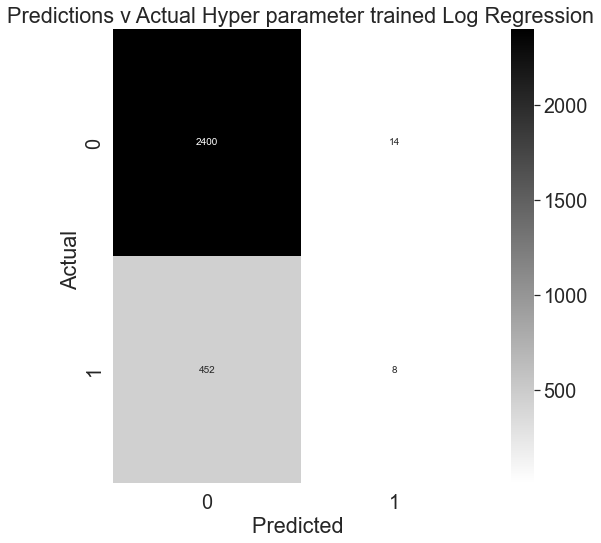

In [212]:
import seaborn as sns

# Here mod_pred =0 index in hyper parameter tuned log_reg
cm = confusion_matrix(y_test, mod_pred[0])

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="gist_gray_r")
sns.set(font_scale=1.8)
plt.title("Predictions v Actual Hyper parameter trained Log Regression")
plt.ylabel("Actual ")
plt.xlabel("Predicted ")
plt.tight_layout()

#### ANALYSIS:
- This outcome looks like a NOT good balance, maximum Non NPA (2400) are predicted correctly, 
- but failed to predct all NPA as NPA, ONLY 8 predicted as NPA out of 460, Remaining 452 are actual NPA are predicted wrongly as non NPA

- Here we should have high recall rate for class =1, we  should identify all NON NPA candidate early as Non NPA, So this will help business to target them


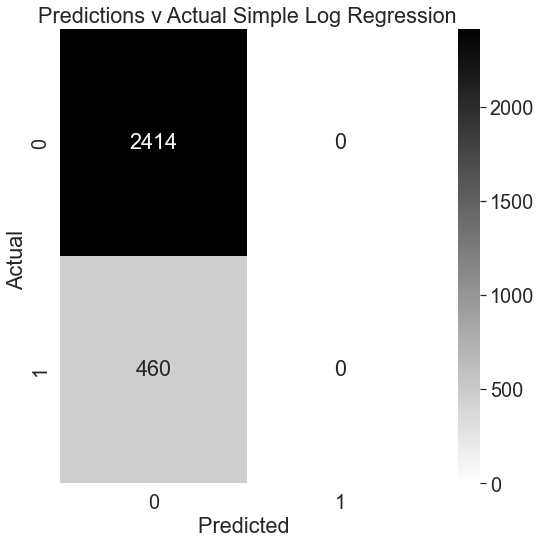

In [255]:

cm = confusion_matrix(y_test, simple_model['Smp_LogReg'])

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="gist_gray_r")
sns.set(font_scale=1.8)
plt.title("Predictions v Actual Simple Log Regression")
plt.ylabel("Actual ")
plt.xlabel("Predicted ")
plt.tight_layout()


## 5.4. Model Evaluation - ROC AUC  

Area under curve dummy_mod is 0.52
Area under curve Smp_LogReg is 0.62
Area under curve Smp_DT is 0.53
Area under curve Smp_RF is 0.66
Area under curve log_reg is 0.69
Area under curve random_forest is 0.63


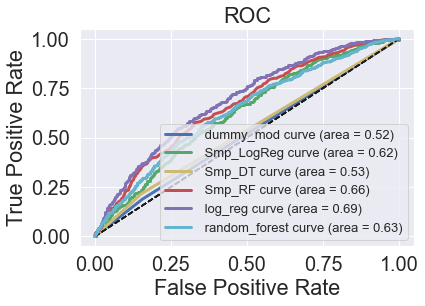

In [214]:
#Simple model

i=0

color = ['b','g', 'y' , 'r', 'm', 'c','k','w']

for model, pred_prob_val in model_prob.items():
    # ROC curve Log Reg
    fpr, tpr, thresholds= roc_curve(y_test, model_prob[model])
    roc_auc = auc(fpr, tpr)
    roc_auc = '{:0.2f}'.format(roc_auc) 

   
    print("Area under curve %s is %s"  %(model, roc_auc))
    # Plot ROC Diagnol curve
    plt.plot([0, 1], [0, 1], 'k--')

    #plt.plot(fpr, tpr)  # X axis false +ve rate, Y axis True +ve rate

    # Or with AUC
    plt.plot(fpr, tpr, color = color[i], lw=3, label=" %s curve (area = %s)" %(model ,roc_auc) )


    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right', fontsize=13)
    plt.title('ROC')
    i=i+1
    
plt.show()



> AUC also not so good for any of the model


<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 6. CONCLUSION </h2>
</div>


- With Simple model and Hyper parameter tuned model we are not getting good recall, so we need to try other methods

- This outcome looks like a NOT good balance, maximum Non NPA (2400) are predicted correctly, 
- but failed to predct all NPA as NPA, ONLY 8 predicted as NPA out of 460 in , Remaining 452 are actual NPA are predicted wrongly as non NPA

- Here we should have high recall rate for class =1, we  should identify all NON NPA candidate early as Non NPA, So this will help business to target them


<div class="alert alert-info" style="background-color:#000492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 7.HANDLE IMBALANCED DATA AND TRY DIFFERENT MODEL </h2>
</div>


- Here we are trying with SMOTE - Oversampling method with Tomek undersampling

- Resampling or Undersampling we should do only to Train data, not test data

In [215]:
from imblearn.combine import SMOTETomek
from collections import Counter

# 1st split the data into train and test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.30, random_state=101)



##### Apply Unviased data handling only to train data

In [256]:
print("Before unblance handling y-train dataset", Counter(y_train_new))

smt = SMOTETomek(sampling_strategy = 'minority')
X_train_smt, y_train_smt = smt.fit_resample(X_train_new,y_train_new)

print("After unblance handling y-train",Counter(y_train_smt))

Before unblance handling y-train dataset Counter({0: 5614, 1: 1090})
After unblance handling y-train Counter({1: 5240, 0: 5240})


In [218]:
#X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, test_size=0.30, random_state=101)

In [257]:
print("test asis y data",Counter(y_test_new))  # Test data still will have imbalance

test asis y data Counter({0: 2431, 1: 443})


### 7.1 APPLY Simple Model - Without Hyper Parameter Tuning

In [220]:
simple_model1 ={}
model_prob1 ={}


# 1. Dummy Classifier
dummy1 = DummyClassifier(strategy='stratified', random_state=42)
dummy1.fit(X_train_smt, y_train_smt)
dummy_pred1 = dummy1.predict(X_test_new)
simple_model1['dummy_mod_smt'] = dummy_pred1

y_pred_prob_dum1 = dummy1.predict_proba(X_test_new)[:,1]
model_prob1['dummy_mod_smt'] = y_pred_prob_dum1


# 2. Log Regression
log_reg1 = LogisticRegression()
log_reg1.fit(X_train_smt,y_train_smt)

# test the model
predictions_logR1 = log_reg1.predict(X_test_new)
#simple_model.append({'Smp_LogReg': predictions_logR})
simple_model1['Smp_LogReg_smt'] = predictions_logR1

y_pred_prob_LogR1 = log_reg1.predict_proba(X_test_new)[:,1]
model_prob1['Smp_LogReg_smt'] = y_pred_prob_LogR1


# 3. Decision Tree
dtree1 = DecisionTreeClassifier()
dtree1.fit(X_train_smt,y_train_smt)

predictions_Dt1 = dtree1.predict(X_test_new)
#simple_model.append({'Smp_DT': predictions_Dt})
simple_model1['Smp_DT_smt'] = predictions_Dt1

y_pred_prob_Dt1 = dtree.predict_proba(X_test_new)[:,1]
model_prob1['Smp_DT_smt'] = y_pred_prob_Dt1



# 4. Random Forest
# Here settig no of DT =600
rfc1 = RandomForestClassifier(n_estimators=600)
rfc1.fit(X_train_smt,y_train_smt)
predictions_rf1 = rfc1.predict(X_test_new)

#simple_model.append({'Smp_RF': predictions_rf})
simple_model1['Smp_RF_smt'] = predictions_rf1

y_pred_prob_rf1 = rfc.predict_proba(X_test_new)[:,1]
model_prob1['Smp_RF_smt'] = y_pred_prob_rf1



In [221]:
simple_model1

{'dummy_mod_smt': array([1, 0, 0, ..., 0, 0, 1], dtype=int64),
 'Smp_LogReg_smt': array([0, 1, 0, ..., 1, 1, 0], dtype=int64),
 'Smp_DT_smt': array([1, 1, 0, ..., 1, 1, 0], dtype=int64),
 'Smp_RF_smt': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}

In [222]:
model_prob1

{'dummy_mod_smt': array([1., 0., 0., ..., 0., 0., 1.]),
 'Smp_LogReg_smt': array([0.49060433, 0.68408663, 0.33041645, ..., 0.51258165, 0.588898  ,
        0.35047228]),
 'Smp_DT_smt': array([0., 0., 0., ..., 0., 0., 0.]),
 'Smp_RF_smt': array([0.08333333, 0.265     , 0.00666667, ..., 0.04833333, 0.25666667,
        0.005     ])}

### 7.2 Apply Hyper Parameter tuning 

- Used earlier defined param dict "model_params"

In [223]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error, precision_score, recall_score

scores1 =[]
mod_pred1 = []

for model_name, mp in model_params.items():
    print("----- {} -----".format(model_name))
    # Here scoring can be scoring="roc_auc" also
    clf =  GridSearchCV(estimator = mp['model'], param_grid = mp['params'], cv=5, scoring = 'accuracy', return_train_score=False,verbose = 1, n_jobs = -1)
   
    # Here all the models are searched best param combination and fitted with same param Ex:  logistic_regression.fit(X_train,y_train)
    clf.fit(X_train_smt,y_train_smt)
    #Now  if we call logistic_regression.predict(y_test)  will give the predicted value with hyper parameter tuned model
    y_pred = clf.predict(X_test_new)
    
    mod_pred1.append(clf.predict(X_test_new))
    model_name_new = model_name+'smt'
    print(model_name_new)
    
    #FOR ROC
   # y_pred_prob_rf = rfc.predict_proba(X_test)[:,1]
    model_prob1[model_name_new] =clf.predict_proba(X_test_new)[:,1]
    
    scores1.append({
        'model': model_name_new,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'accuracy_score':  accuracy_score( y_test_new,y_pred),
        'precision_score': precision_score( y_test_new, y_pred),
        'recall_score': recall_score( y_test_new, y_pred),
        'f1_score': f1_score(y_test_new, y_pred)

    })


----- log_reg -----
Fitting 5 folds for each of 14 candidates, totalling 70 fits
log_regsmt
----- random_forest -----
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
random_forestsmt


In [224]:
model_prob1

{'dummy_mod_smt': array([1., 0., 0., ..., 0., 0., 1.]),
 'Smp_LogReg_smt': array([0.49060433, 0.68408663, 0.33041645, ..., 0.51258165, 0.588898  ,
        0.35047228]),
 'Smp_DT_smt': array([0., 0., 0., ..., 0., 0., 0.]),
 'Smp_RF_smt': array([0.08333333, 0.265     , 0.00666667, ..., 0.04833333, 0.25666667,
        0.005     ]),
 'log_regsmt': array([0.27112411, 0.28229548, 0.0694582 , ..., 0.27428651, 0.52879954,
        0.20252846]),
 'random_forestsmt': array([0.12578981, 0.48      , 0.        , ..., 0.22424242, 0.31357143,
        0.20694444])}

In [225]:
scores1

[{'model': 'log_regsmt',
  'best_score': 0.7545935706345425,
  'best_params': {'C': 1, 'penalty': 'l1'},
  'accuracy_score': 0.708768267223382,
  'precision_score': 0.24010554089709762,
  'recall_score': 0.4108352144469526,
  'f1_score': 0.30308076602830974},
 {'model': 'random_forestsmt',
  'best_score': 0.8089008371333287,
  'best_params': {'bootstrap': True,
   'max_depth': 80,
   'max_features': 'sqrt',
   'min_samples_leaf': 3,
   'min_samples_split': 8,
   'n_estimators': 10},
  'accuracy_score': 0.7574808629088379,
  'precision_score': 0.23868312757201646,
  'recall_score': 0.2618510158013544,
  'f1_score': 0.24973089343379978}]


<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 8. Model Evaluation </h2>
</div>


### 8.1 Evaluate best_params, accuracy_score, precision_score, recall_score, f1_score  for  SMOTE+Tomek Data

In [226]:
# 1. Unbiased data handled and Hyper parameter Tuned model
df1 = pd.DataFrame(scores1,columns=['model','best_score','best_params','accuracy_score','precision_score','recall_score','f1_score'])

# 1.  Unbiased data handled Simple Model - No hyper parameter Tune
for model, pred_val in simple_model1.items():
    row = []
    row = pd.DataFrame([[model, 0, 0 ,
                           accuracy_score(y_test_new, simple_model1[model]),
                     precision_score(y_test_new, simple_model1[model]),
                        recall_score(y_test_new, simple_model1[model]),
                        f1_score(y_test_new, simple_model1[model])
                       ]], 
                    columns=['model','best_score','best_params','accuracy_score','precision_score','recall_score','f1_score'])
    df1 = df1.append(row,sort=False)

print("Score after Imbalance data handle by SMOTE and Tomek:")
df1


Score after Imbalance data handle by SMOTE and Tomek:


,model,best_score,best_params,accuracy_score,precision_score,recall_score,f1_score
0,log_regsmt,0.754594,"{'C': 1, 'penalty': 'l1'}",0.708768,0.240106,0.410835,0.303081
1,random_forestsmt,0.808901,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.757481,0.238683,0.261851,0.249731
0,dummy_mod_smt,0.000000,0,0.489562,0.141457,0.455982,0.215927
0,Smp_LogReg_smt,0.000000,0,0.549408,0.178733,0.534989,0.267948
0,Smp_DT_smt,0.000000,0,0.664927,0.168367,0.297968,0.215159
0,Smp_RF_smt,0.000000,0,0.772443,0.225974,0.196388,0.210145


In [227]:
print("Score Before Imbalance data handl:")
df

Score Before Imbalance data handl:


,model,best_score,best_params,accuracy_score,precision_score,recall_score,f1_score
0,log_reg,0.841438,"{'C': 10, 'penalty': 'l1'}",0.837857,0.363636,0.017391,0.033195
1,random_forest,0.839499,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.836465,0.368421,0.030435,0.056225
0,dummy_mod,0.000000,0,0.738344,0.186695,0.189130,0.187905
0,Smp_LogReg,0.000000,0,0.839944,0.000000,0.000000,0.000000
0,Smp_DT,0.000000,0,0.746347,0.211991,0.215217,0.213592
0,Smp_RF,0.000000,0,0.838553,0.409091,0.019565,0.037344


### Analysis

> We can see so much improvisation in Recall and precision in all the model after handling imbalance data. 

> Now SMOTE+Tomek applied with Simple LogisticRegression model and Hyper Parameter tuned LogisticRegression looks more good model.



### 8.2 Evaluate Confusion Matrix , Classification Report   for  SMOTE+Tomek Data

In [228]:
#Hyper parameter tuned model

i=0
    
for model_name, mp in model_params.items():
    model_name1 = model_name+'smt'
    print("------------------------------------------------------------------------")
    print("Hyper parameter Tuned {} - Confusion_Matrix: \n".format(model_name1.upper()))
    print(confusion_matrix(y_test_new, mod_pred1[i]))
    
   
              
    print("\nHyper parameter Tuned {} - Classification_Report: \n".format(model_name1.upper()))
    print(classification_report(y_test_new,mod_pred1[i]))

    i= i+1


    
#Simple model
for model, pred_val in simple_model1.items():
    model_name1 = model+'smt'
    print("------------------------------------------------------------------------")
    print("{} - Confusion_Matrix: \n".format(model_name1.upper()))
    print(confusion_matrix(y_test_new, simple_model1[model]))
    
    print("{} - Classification_Report: \n".format(model_name1.upper()))
    print(classification_report(y_test_new, simple_model1[model]))


------------------------------------------------------------------------
Hyper parameter Tuned LOG_REGSMT - Confusion_Matrix: 

[[1855  576]
 [ 261  182]]

Hyper parameter Tuned LOG_REGSMT - Classification_Report: 

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      2431
           1       0.24      0.41      0.30       443

    accuracy                           0.71      2874
   macro avg       0.56      0.59      0.56      2874
weighted avg       0.78      0.71      0.74      2874

------------------------------------------------------------------------
Hyper parameter Tuned RANDOM_FORESTSMT - Confusion_Matrix: 

[[2061  370]
 [ 327  116]]

Hyper parameter Tuned RANDOM_FORESTSMT - Classification_Report: 

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2431
           1       0.24      0.26      0.25       443

    accuracy                           0.76      2874
   macro av

### 8.3 Confusion Matrix - Plot

####  Here we draw this for only Hyper parameter model after Unblanaced handling

In [229]:
Counter(y_test_new)

Counter({0: 2431, 1: 443})

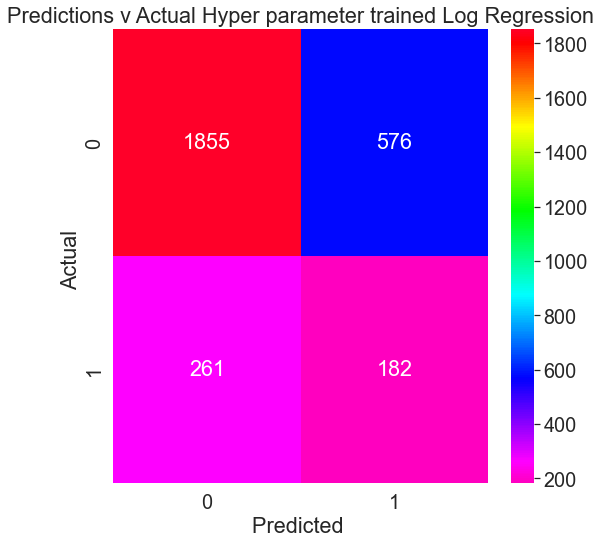

In [230]:
import seaborn as sns

# Here mod_pred =0 index in hyper parameter tuned log_reg
cm1 = confusion_matrix(y_test_new, mod_pred1[0])

plt.figure(figsize=(8,8))
sns.heatmap(cm1, annot=True, fmt="d", cmap="gist_rainbow_r")
sns.set(font_scale=1.8)
plt.title("Predictions v Actual Hyper parameter trained Log Regression")
plt.ylabel("Actual ")
plt.xlabel("Predicted ")
plt.tight_layout()

> Earlier non of the NPA are correctly categorized, now 189 are correctly identified out of 443

> New Hyper parameter tuned Logistic regression is more better than Old Hyper parameter tuned Logistic regression Confusion matrix Log

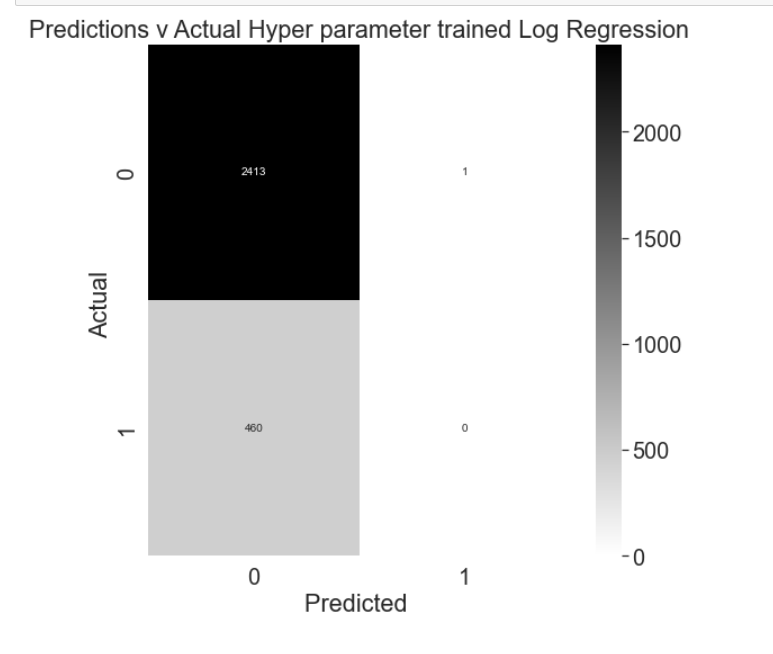

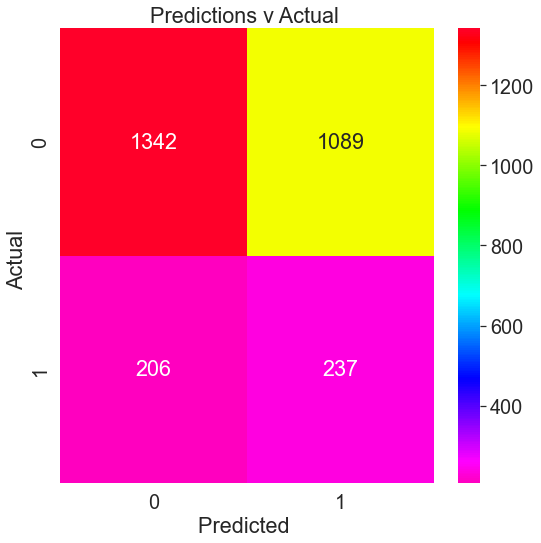

In [231]:
cm2 = confusion_matrix(y_test_new, simple_model1['Smp_LogReg_smt'])

plt.figure(figsize=(8,8))
sns.heatmap(cm2, annot=True, fmt="d", cmap="gist_rainbow_r")
sns.set(font_scale=1.8)
plt.title("Predictions v Actual ")
plt.ylabel("Actual ")
plt.xlabel("Predicted ")
plt.tight_layout()

> Earlier non of the NPA are correctly categorized, now 237 are correctly identified out of 443

> New Simple Logistic regression is more better than Old simple Logistic regression 

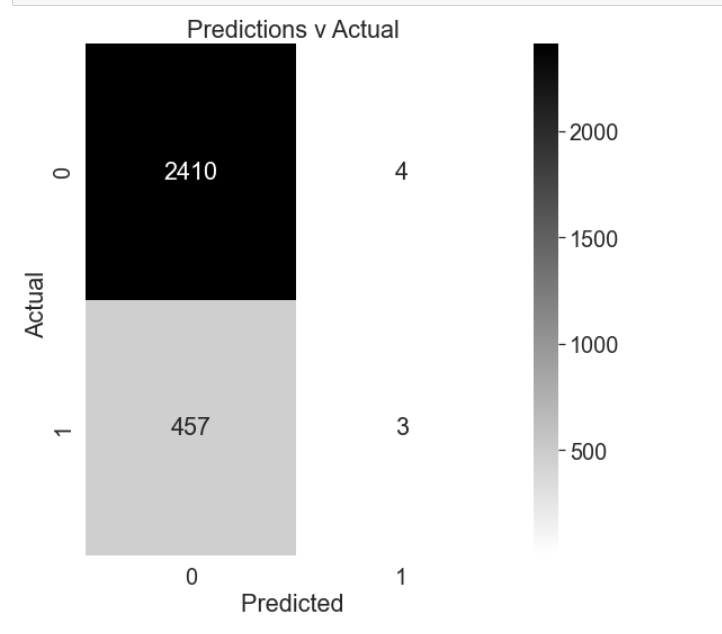

## 8.4. Model Evaluation - ROC AUC  

Area under curve dummy_mod_smt is 0.48
Area under curve Smp_LogReg_smt is 0.57
Area under curve Smp_DT_smt is 0.86
Area under curve Smp_RF_smt is 0.95
Area under curve log_regsmt is 0.62
Area under curve random_forestsmt is 0.62


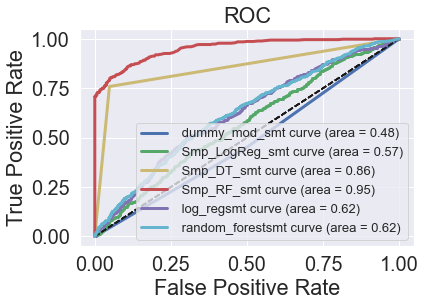

In [232]:
#Simple model

i=0

color = ['b','g', 'y' , 'r', 'm', 'c','k','w']

for model, pred_prob_val in model_prob1.items():
    # ROC curve Log Reg
    fpr, tpr, thresholds= roc_curve(y_test_new, model_prob1[model])
    roc_auc = auc(fpr, tpr)
    roc_auc = '{:0.2f}'.format(roc_auc) 

   
    print("Area under curve %s is %s"  %(model, roc_auc))
    # Plot ROC Diagnol curve
    plt.plot([0, 1], [0, 1], 'k--')

    #plt.plot(fpr, tpr)  # X axis false +ve rate, Y axis True +ve rate

    # Or with AUC
    plt.plot(fpr, tpr, color = color[i], lw=3, label=" %s curve (area = %s)" %(model ,roc_auc) )


    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right', fontsize=13)
    plt.title('ROC')
    i=i+1
    
plt.show()


> Simple Logistic Regression  is better precision and good confusion metrix after Handling Unbalanced data

- Now we have 95% AUC for Simple log regression, earlier it was very bad

- Old ROC Curve

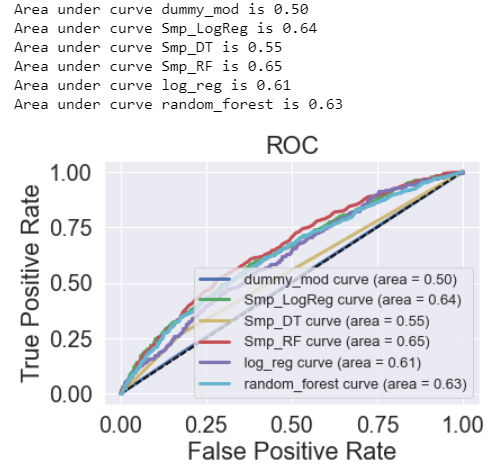



<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 9. CONCLUSION </h2>
</div>


### Conclusion:

- Simple Logistic Regression  is better precision and good confusion metrix after Handling Unbalanced data, But still 50-50, not  identified all NPA


**Now we  have high recall rate for class =1, we  are able to identify all NON NPA candidate early as Non NPA, So this will help business to target them**


<div class="alert alert-info" style="background-color:#000492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 10. Now apply Standard scalar along with Imbalance data handling and Hyper parameter tuning </h2>
</div>


### 10.1 Apply Standard Scalar

- Apply standard scalar only to X data before splitting

In [233]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [234]:
x_scaled[0]

array([ 0.49222226, -0.13931753,  2.46309947,  0.68038804,  0.99850529,
        0.68882488,  0.4322297 ,  0.35373245,  0.18270369, -0.71698894,
       -0.29973008, -0.23700318, -0.38955828,  1.19185595, -0.19272081,
       -0.2651173 , -0.21864717, -0.26285458])

In [235]:
from imblearn.combine import SMOTETomek
from collections import Counter

# 1st split the data into train and test
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(x_scaled, y, test_size=0.30, random_state=101)


##### Apply Unvbiased data handling only to train data

In [259]:
#print("Before handling", Counter(X_train_scale))

smt = SMOTETomek(sampling_strategy = 'minority')
X_train_scale_smt, y_train_scale_smt = smt.fit_resample(X_train_scale,y_train_scale)

print("After handling",Counter(y_train_smt))

After handling Counter({1: 5240, 0: 5240})


### 10.1 APPLY Simple Model with scaled data and Without Hyper Parameter Tuning

In [237]:
simple_model2 ={}
model_prob2 ={}


# 1. Dummy Classifier
dummy2 = DummyClassifier(strategy='stratified', random_state=42)
dummy2.fit(X_train_scale_smt, y_train_scale_smt)
dummy_pred2 = dummy2.predict(X_test_scale)
simple_model2['dummy_mod_smt1'] = dummy_pred2

y_pred_prob_dum2 = dummy2.predict_proba(X_test_scale)[:,1]
model_prob2['dummy_mod_smt1'] = y_pred_prob_dum2


# 2. Log Regression
log_reg2 = LogisticRegression()
log_reg2.fit(X_train_scale_smt,y_train_scale_smt)

# test the model
predictions_logR2 = log_reg2.predict(X_test_scale)
#simple_model.append({'Smp_LogReg': predictions_logR})
simple_model2['Smp_LogReg_smt1'] = predictions_logR2

y_pred_prob_LogR2 = log_reg1.predict_proba(X_test_scale)[:,1]
model_prob2['Smp_LogReg_smt1'] = y_pred_prob_LogR2


# 3. Decision Tree
dtree2 = DecisionTreeClassifier()
dtree2.fit(X_train_scale_smt,y_train_scale_smt)

predictions_Dt2 = dtree2.predict(X_test_scale)
#simple_model.append({'Smp_DT': predictions_Dt})
simple_model2['Smp_DT_smt1'] = predictions_Dt2

y_pred_prob_Dt2 = dtree.predict_proba(X_test_scale)[:,1]
model_prob2['Smp_DT_smt1'] = y_pred_prob_Dt2



# 4. Random Forest
# Here settig no of DT =600
rfc2 = RandomForestClassifier(n_estimators=600)
rfc2.fit(X_train_scale_smt,y_train_scale_smt)
predictions_rf2 = rfc2.predict(X_test_scale)

#simple_model.append({'Smp_RF': predictions_rf})
simple_model2['Smp_RF_smt1'] = predictions_rf2

y_pred_prob_rf2 = rfc.predict_proba(X_test_scale)[:,1]
model_prob2['Smp_RF_smt1'] = y_pred_prob_rf2



In [238]:
simple_model2

{'dummy_mod_smt1': array([1, 0, 0, ..., 0, 0, 1], dtype=int64),
 'Smp_LogReg_smt1': array([0, 1, 0, ..., 1, 1, 0], dtype=int64),
 'Smp_DT_smt1': array([0, 1, 0, ..., 0, 1, 0], dtype=int64),
 'Smp_RF_smt1': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}

In [239]:
y_pred_prob_rf2

array([0.49833333, 0.46166667, 0.52166667, ..., 0.51666667, 0.42333333,
       0.52166667])

### 10.2 Apply Hyper Parameter tuning 

- Used earlier defined parameter list func model_params

In [241]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error, precision_score, recall_score

scores2 =[]
mod_pred2 = []

for model_name, mp in model_params.items():
    print("----- {} -----".format(model_name))
    # Here scoring can be scoring="roc_auc" also
    clf =  GridSearchCV(estimator = mp['model'], param_grid = mp['params'], cv=5, scoring = 'accuracy', return_train_score=False,verbose = 1, n_jobs = -1)
   
    # Here all the models are searched best param combination and fitted with same param Ex:  logistic_regression.fit(X_train,y_train)
    clf.fit(X_train_scale_smt,y_train_scale_smt)
    #Now  if we call logistic_regression.predict(y_test)  will give the predicted value with hyper parameter tuned model
    y_pred = clf.predict(X_test_scale)
    
    mod_pred2.append(clf.predict(X_test_scale))
    model_name_new = model_name+'smt2'
    print(model_name_new)
    
    #FOR ROC
   # y_pred_prob_rf = rfc.predict_proba(X_test)[:,1]
    model_prob2[model_name_new] =clf.predict_proba(X_test_scale)[:,1]
    
    scores2.append({
        'model': model_name_new,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'accuracy_score':  accuracy_score( y_test_scale,y_pred),
        'precision_score': precision_score( y_test_scale, y_pred),
        'recall_score': recall_score( y_test_scale, y_pred),
        'f1_score': f1_score(y_test_scale, y_pred)

    })


----- log_reg -----
Fitting 5 folds for each of 14 candidates, totalling 70 fits
log_regsmt2
----- random_forest -----
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
random_forestsmt2


In [242]:
model_prob2

{'dummy_mod_smt1': array([1., 0., 0., ..., 0., 0., 1.]),
 'Smp_LogReg_smt1': array([0.50074582, 0.50403101, 0.49558498, ..., 0.50087299, 0.50305236,
        0.49552486]),
 'Smp_DT_smt1': array([0., 0., 0., ..., 0., 0., 0.]),
 'Smp_RF_smt1': array([0.49833333, 0.46166667, 0.52166667, ..., 0.51666667, 0.42333333,
        0.52166667]),
 'log_regsmt2': array([0.456734  , 0.49496377, 0.22091861, ..., 0.49442635, 0.72196727,
        0.24993568]),
 'random_forestsmt2': array([0.35044945, 0.49634979, 0.01742424, ..., 0.40182327, 0.39731729,
        0.01666667])}


<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 11. Model Evaluation </h2>
</div>


### 11.1 Evaluate best_params, accuracy_score, precision_score, recall_score, f1_score  for  SMOTE+Tomek and scaled data  

In [243]:
# 1. Hyper parameter Tuned model
df2 = pd.DataFrame(scores1,columns=['model','best_score','best_params','accuracy_score','precision_score','recall_score','f1_score'])

# 1. Simple Model - No hyper parameter Tune
for model, pred_val in simple_model2.items():
    row = []
    row = pd.DataFrame([[model, 0, 0 ,
                           accuracy_score(y_test_scale, simple_model2[model]),
                     precision_score(y_test_scale, simple_model2[model]),
                        recall_score(y_test_scale, simple_model2[model]),
                        f1_score(y_test_scale, simple_model2[model])
                       ]], 
                    columns=['model','best_score','best_params','accuracy_score','precision_score','recall_score','f1_score'])
    df2 = df2.append(row,sort=False)

print("Score after  scaling and Imbalance data handle by SMOTE and Tomek:")
df2


Score after  scaling and Imbalance data handle by SMOTE and Tomek:


,model,best_score,best_params,accuracy_score,precision_score,recall_score,f1_score
0,log_regsmt,0.754594,"{'C': 1, 'penalty': 'l1'}",0.708768,0.240106,0.410835,0.303081
1,random_forestsmt,0.808901,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.757481,0.238683,0.261851,0.249731
0,dummy_mod_smt1,0.000000,0,0.489562,0.141457,0.455982,0.215927
0,Smp_LogReg_smt1,0.000000,0,0.620390,0.228643,0.616253,0.333537
0,Smp_DT_smt1,0.000000,0,0.722686,0.197952,0.261851,0.225462
0,Smp_RF_smt1,0.000000,0,0.804802,0.267717,0.153499,0.195122


### Analysis

> We can see so much improvisation in Recall and precision in few model after Scaling and handling imbalance data. 

> Now SCaling applied on X data and SMOTE+Tomek applied with Simple LogisticRegression model and Hyper Parameter tuned LogisticRegression looks more good model with Improved Recall.



## 11.2 Evaluate Confusion Matrix , Classification Report for SMOTE+Tomek Data

In [244]:
#Hyper parameter tuned model

i=0
    
for model_name, mp in model_params.items():
    model_name1 = model_name+'smt1'
    print("------------------------------------------------------------------------")
    print("Hyper parameter Tuned {} - Confusion_Matrix: \n".format(model_name1.upper()))
    print(confusion_matrix(y_test_scale, mod_pred1[i]))
    
   
              
    print("\nHyper parameter Tuned {} - Classification_Report: \n".format(model_name1.upper()))
    print(classification_report(y_test_scale,mod_pred2[i]))

    i= i+1


    
#Simple model
for model, pred_val in simple_model2.items():
    model_name1 = model
    print("------------------------------------------------------------------------")
    print("{} - Confusion_Matrix: \n".format(model_name1.upper()))
    print(confusion_matrix(y_test_scale, simple_model2[model]))
    
    print("{} - Classification_Report: \n".format(model_name1.upper()))
    print(classification_report(y_test_scale, simple_model2[model]))


------------------------------------------------------------------------
Hyper parameter Tuned LOG_REGSMT1 - Confusion_Matrix: 

[[1855  576]
 [ 261  182]]

Hyper parameter Tuned LOG_REGSMT1 - Classification_Report: 

              precision    recall  f1-score   support

           0       0.90      0.61      0.73      2431
           1       0.22      0.62      0.33       443

    accuracy                           0.61      2874
   macro avg       0.56      0.61      0.53      2874
weighted avg       0.79      0.61      0.66      2874

------------------------------------------------------------------------
Hyper parameter Tuned RANDOM_FORESTSMT1 - Confusion_Matrix: 

[[2061  370]
 [ 327  116]]

Hyper parameter Tuned RANDOM_FORESTSMT1 - Classification_Report: 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2431
           1       0.26      0.26      0.26       443

    accuracy                           0.77      2874
   macr

### 11.3 Confusion Matrix - Plot

####  Here we draw this for only Hyper parameter model after Unblanaced handling AND SCALING

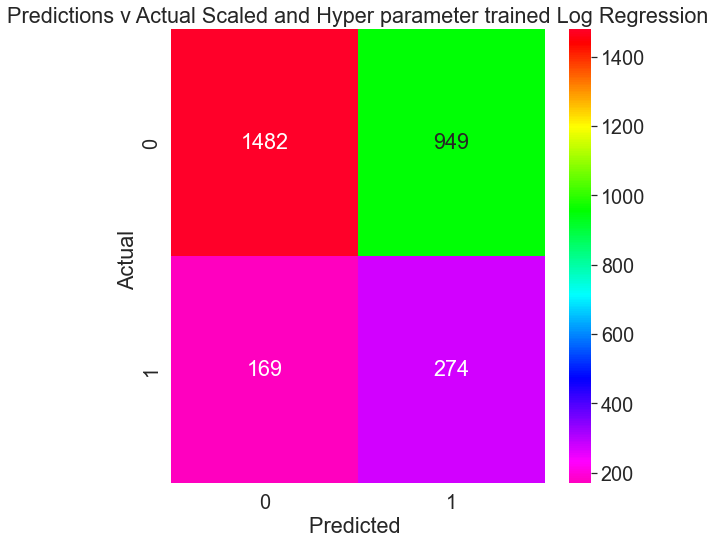

In [245]:
Counter(y_test_scale)
import seaborn as sns

# Here mod_pred =0 index in hyper parameter tuned log_reg
cm3 = confusion_matrix(y_test_scale, mod_pred2[0])

plt.figure(figsize=(8,8))
sns.heatmap(cm3, annot=True, fmt="d", cmap="gist_rainbow_r")
sns.set(font_scale=1.8)
plt.title("Predictions v Actual Scaled and Hyper parameter trained Log Regression")
plt.ylabel("Actual ")
plt.xlabel("Predicted ")
plt.tight_layout()

> Earlier non of the NPA are correctly categorized or only 189 are identified correctly, now 274 are correctly identified out of 443

> New Hyper parameter tuned Logistic regression is more better than Old Hyper parameter tuned Logistic regression Confusion matrix Log



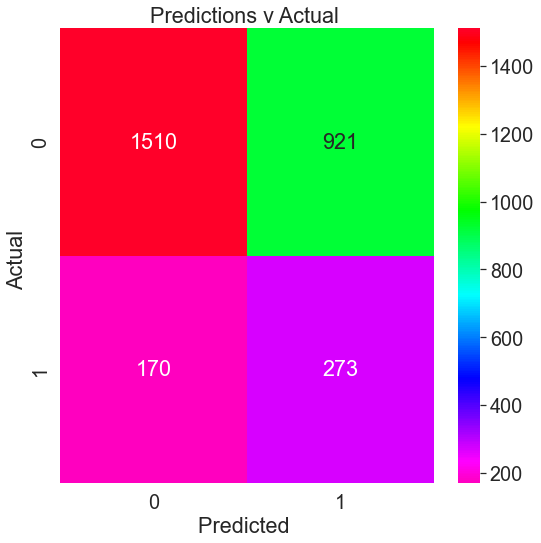

In [246]:
cm4 = confusion_matrix(y_test_scale, simple_model2['Smp_LogReg_smt1'])

plt.figure(figsize=(8,8))
sns.heatmap(cm4, annot=True, fmt="d", cmap="gist_rainbow_r")
sns.set(font_scale=1.8)
plt.title("Predictions v Actual Scaled Simple Log Regression ")
plt.ylabel("Actual ")
plt.xlabel("Predicted ")
plt.tight_layout()

> Earlier non of the NPA are correctly categorized, now 273 are correctly identified out of 443

> New Simple Logistic regression is more better than Old simple Logistic regression 

## 11.4. Model Evaluation - ROC AUC  

Area under curve dummy_mod_smt1 is 0.48
Area under curve Smp_LogReg_smt1 is 0.56
Area under curve Smp_DT_smt1 is 0.50
Area under curve Smp_RF_smt1 is 0.49
Area under curve log_regsmt2 is 0.67
Area under curve random_forestsmt2 is 0.63


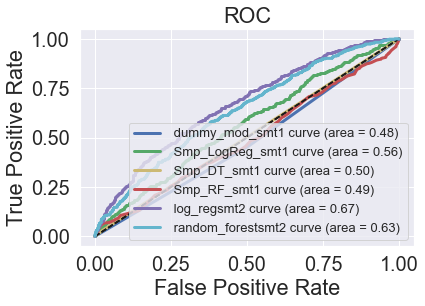

In [260]:
#Simple model

i=0

color = ['b','g', 'y' , 'r', 'm', 'c','k','w']

for model, pred_prob_val in model_prob2.items():
    # ROC curve Log Reg
    fpr, tpr, thresholds= roc_curve(y_test_scale, model_prob2[model])
    roc_auc = auc(fpr, tpr)
    roc_auc = '{:0.2f}'.format(roc_auc) 

   
    print("Area under curve %s is %s"  %(model, roc_auc))
    # Plot ROC Diagnol curve
    plt.plot([0, 1], [0, 1], 'k--')

    #plt.plot(fpr, tpr)  # X axis false +ve rate, Y axis True +ve rate

    # Or with AUC
    plt.plot(fpr, tpr, color = color[i], lw=3, label=" %s curve (area = %s)" %(model ,roc_auc) )


    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right', fontsize=13)
    plt.title('ROC')
    i=i+1
    
plt.show()


> AUC looks average, but overall Recall increased after applying Scaling and hyper parameter tuning


<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 12. CONCLUSION </h2>
</div>


### Conclusion:

- Simple Logistic Regression  is better precision and good confusion metrix after Scaling and Handling Unbalanced data


**Now we  have high recall rate for class =1, we  are able to identify most of NPA candidate early as NPA, So this will help business to target them**

####  Outcome:By this model reduced the False Negative Errors of such Actual NPA(1) predicted as Non NPA(0)  which is a great advantage for the PeerLoanKart financial company and its customers as well.
    
